
# Challenge - Time Series Analysis

Using a different time series data set (either from FRED or elsewhere, go about the process of time series modeling. Specifically generate the following things:

* Plot the time series, along with any logical or necessary differences to get a stationary dataset
* Generate and interpret a PACF for the time series (and/or its differences)
* Generate 5 ARIMA specifications and evaluate their efficacy at modeling your data
* Finally choose one specification and make the case for that as a logical model for your dataset.

This should come in the form of a notebook with the necessary prose to explain your process. Remember to use the tools of text, visuals, and analysis to tell a clear and concise story with your data.



In [27]:
%reload_ext nb_black

import pandas as pd
import numpy as np

import scipy
from datetime import datetime
import datetime as dt

import matplotlib.pyplot as plt

%matplotlib inline

from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Chose the unemployent rate time series data from the FRED database

In [2]:
df = pd.read_csv(
    "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=UNRATE&scale=left&cosd=1948-01-01&coed=2020-05-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2009-06-01&line_index=1&transformation=lin&vintage_date=2020-06-16&revision_date=2020-06-16&nd=1948-01-01"
)

<IPython.core.display.Javascript object>

In [3]:
df.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


<IPython.core.display.Javascript object>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    869 non-null    object 
 1   UNRATE  869 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.7+ KB


<IPython.core.display.Javascript object>

In [5]:
#converting DATE to a datetime object
df["DATE"] = pd.to_datetime(df["DATE"])

<IPython.core.display.Javascript object>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    869 non-null    datetime64[ns]
 1   UNRATE  869 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.7 KB


<IPython.core.display.Javascript object>

In [7]:
df.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


<IPython.core.display.Javascript object>

### 1. Plot the time series, along with any logical or necessary differences to get a stationary dataset

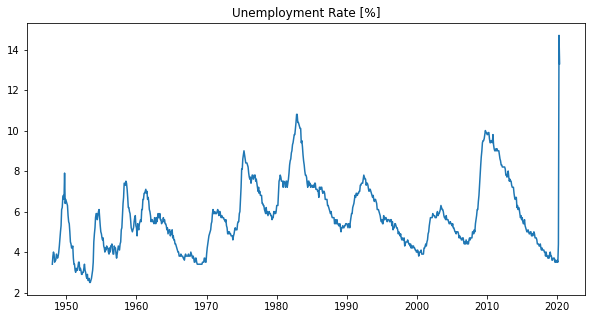

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
#plotting original data
plt.figure(figsize=(10, 5))
plt.plot(df["DATE"], df["UNRATE"])
plt.title("Unemployment Rate [%]")
plt.show()

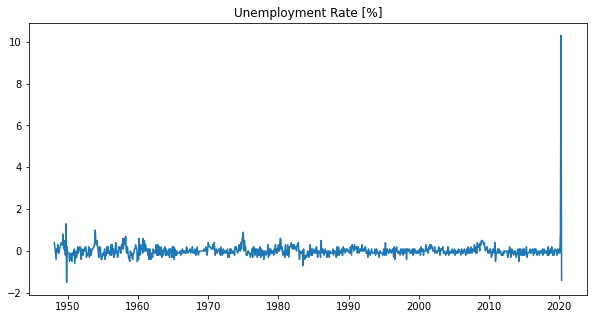

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
#taking a difference to make it stationary
df["diff_1"] = df.UNRATE - df.UNRATE.shift()
plt.figure(figsize=(10, 5))
plt.plot(df["DATE"], df["diff_1"])
plt.title("Unemployment Rate [%]")
plt.show()

### Generate and interpret a PACF for the time series (and/or its differences)

Text(0.5, 1.0, 'Unemploy. Rate PACF')

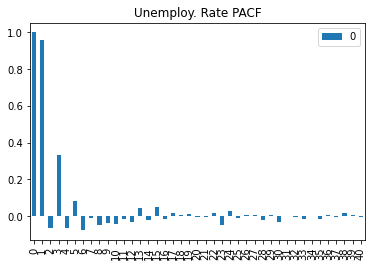

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
#looking at the pacf of the time series

x_acf = pd.DataFrame(pacf(df.UNRATE))
x_acf.plot(kind="bar")
plt.title("Unemploy. Rate PACF")

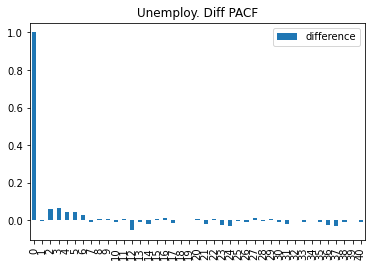

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
# looking at the pacf of the differenced data
x_acf = pd.DataFrame(pacf(df.diff_1[1:]))
x_acf.plot(kind="bar")
plt.title("Unemploy. Diff PACF")
plt.legend(["difference"])

Interpretation: The initial time series has two strong auto correlations, but the differenced data has none.

### 3. Generate 5 ARIMA specifications and evaluate their efficacy at modeling your data

In [31]:
# generating ARIMA models
model = ARIMA(df.UNRATE, order=(0, 1, 0))
model_fit = model.fit()
print(model_fit.summary())
print("Residuals Description")
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  868
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -458.166
Method:                           css   S.D. of innovations              0.410
Date:                Wed, 17 Jun 2020   AIC                            920.333
Time:                        15:00:38   BIC                            929.865
Sample:                             1   HQIC                           923.981
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0114      0.014      0.819      0.413      -0.016       0.039
Residuals Description
count    8.680000e+02
mean     6.203526e-10
std      4.104420e-01
min     -1.511406e+00
25%     -1.114055e-01

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
# generating ARIMA models
model = ARIMA(df.UNRATE, order=(1, 1, 0))
model_fit = model.fit()
print(model_fit.summary())
print("Residuals Description")
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  868
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -458.141
Method:                       css-mle   S.D. of innovations              0.410
Date:                Wed, 17 Jun 2020   AIC                            922.282
Time:                        15:00:46   BIC                            936.580
Sample:                             1   HQIC                           927.753
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0114      0.014      0.826      0.409      -0.016       0.038
ar.L1.D.UNRATE    -0.0077      0.034     -0.226      0.821      -0.075       0.059
                                    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
# generating ARIMA models
model = ARIMA(df.UNRATE, order=(0, 1, 1))
model_fit = model.fit()
print(model_fit.summary())
print("Residuals Description")
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  868
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -458.143
Method:                       css-mle   S.D. of innovations              0.410
Date:                Wed, 17 Jun 2020   AIC                            922.287
Time:                        15:01:06   BIC                            936.586
Sample:                             1   HQIC                           927.759
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0114      0.014      0.825      0.409      -0.016       0.039
ma.L1.D.UNRATE    -0.0069      0.032     -0.214      0.830      -0.070       0.056
                                    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
# generating ARIMA models
model = ARIMA(df.UNRATE, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())
print("Residuals Description")
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  868
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -455.029
Method:                       css-mle   S.D. of innovations              0.409
Date:                Wed, 17 Jun 2020   AIC                            918.059
Time:                        15:01:17   BIC                            937.123
Sample:                             1   HQIC                           925.354
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0153      0.020      0.770      0.442      -0.024       0.054
ar.L1.D.UNRATE     0.8731      0.067     13.072      0.000       0.742       1.004
ma.L1.D.UNRATE    -0.8199      0.072

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
# generating ARIMA models
model = ARIMA(df.UNRATE, order=(1, 2, 1))
model_fit = model.fit()
print(model_fit.summary())
print("Residuals Description")
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:              D2.UNRATE   No. Observations:                  867
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -454.428
Method:                       css-mle   S.D. of innovations              0.408
Date:                Wed, 17 Jun 2020   AIC                            916.856
Time:                        15:01:34   BIC                            935.916
Sample:                             2   HQIC                           924.150
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0022      0.003      0.776      0.438      -0.003       0.008
ar.L1.D2.UNRATE    -0.2902      0.070     -4.145      0.000      -0.427      -0.153
ma.L1.D2.UNRATE    -0.7418      

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
# generating ARIMA models
model = ARIMA(df.UNRATE, order=(1, 1, 5))
model_fit = model.fit()
print(model_fit.summary())
print("Residuals Description")
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  868
Model:                 ARIMA(1, 1, 5)   Log Likelihood                -443.726
Method:                       css-mle   S.D. of innovations              0.403
Date:                Wed, 17 Jun 2020   AIC                            903.452
Time:                        15:07:47   BIC                            941.581
Sample:                             1   HQIC                           918.043
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0240      0.028      0.865      0.387      -0.030       0.078
ar.L1.D.UNRATE     0.7098      0.122      5.820      0.000       0.471       0.949
ma.L1.D.UNRATE    -0.7588      0.126

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 4. Finally choose one specification and make the case for that as a logical model for your dataset.

The best specification is for ARIMA(1,1,5) due to it's lowest AIC score (903.452).  The worst was for ARIMA(0,1,1) with an AIC score of 922.287.  The probability that we lost less information with the latter model is:

In [57]:
p = np.exp((903.452 - 922.287) / 2)
p

8.128898796252728e-05

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

This suggests that our best model is much better than the worst.